# <center>**Trabajo Práctico Número 2**</center>

### <center>**Regresión del valor de valor medio de casas en distritos de California**</center>

#### <center>Introducción a la Inteligencia Artificial - CEIA & DPLN, Fiuba</center>

<center><img width="35%" src="https://lh5.googleusercontent.com/cPAoMij8-mRhQEFe6cf2R1bncilBk29i0DaUS7EkqUcLb4IdcbjCUaBXcU9k-T59JJDuOkvsB_PDdKa0F3Q54_sAdIi_4tNK5oHYmT20OLV64mFLoiq2G2L-9ihkDdgJSg=w1280"/></center>

---

**Integrantes del grupo**

- Argento, Lucas
- Espínola, Carla
- Gambarte, Antonella
- Putrino, Daniela
- Silvera, Ricardo

---


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


#### 1. Obtener la correlación entre los atributos y entre los atributos y el target.

1. ¿Qué atributo tiene mayor correlación lineal con el target?
2. ¿Cuáles atributos parecen estar más correlacionados entre sí? Se pueden calcular los coeficientes de correlación o representarlos gráficamente mediante un mapa de calor.


In [93]:
data = fetch_california_housing()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['MedHouseVal'] = data.target

features = list(set(df.columns) - set(['MedHouseVal']))

X = df[features]
y = df.MedHouseVal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
df_train = X_train.copy()
df_train['MedHouseVal'] = y_train

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
df_train_scaled['MedHouseVal'] = y_train

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 7061 to 15795
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AveBedrms    14448 non-null  float64
 1   AveOccup     14448 non-null  float64
 2   Population   14448 non-null  float64
 3   Latitude     14448 non-null  float64
 4   AveRooms     14448 non-null  float64
 5   HouseAge     14448 non-null  float64
 6   MedInc       14448 non-null  float64
 7   Longitude    14448 non-null  float64
 8   MedHouseVal  14448 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


Como se puede observar, todos los atributos son del tipo numéricos por lo que no es necesario hacer ninguna conversión.

A continuación se muestra una descripción estadísticas de las variables:


In [97]:
X_train.describe()

,AveBedrms,AveOccup,Population,Latitude,AveRooms,HouseAge,MedInc,Longitude
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,1.098033,3.119236,1427.927326,35.650669,5.438125,28.575374,3.876892,-119.584102
std,0.447498,12.373636,1140.225190,2.135742,2.453569,12.613634,1.904908,2.002930
min,0.333333,0.692308,3.000000,32.550000,0.888889,1.000000,0.499900,-124.350000
25%,1.006783,2.430380,791.000000,33.940000,4.448928,18.000000,2.567225,-121.800000
50%,1.049492,2.817147,1168.000000,34.270000,5.232422,29.000000,3.539100,-118.510000
75%,1.100328,3.279135,1727.000000,37.720000,6.060692,37.000000,4.758075,-118.010000
max,25.636364,1243.333333,35682.000000,41.950000,141.909091,52.000000,15.000100,-114.310000


#### Matriz de correlación


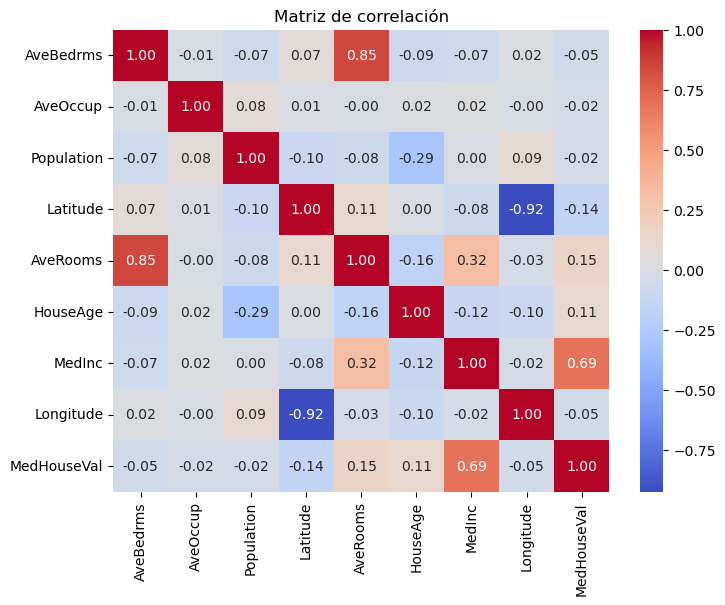

In [98]:
corr = df_train.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f",cbar=True)
plt.title("Matriz de correlación")
plt.show()

Como se puede observar, el atributo que tiene mayor correlación lineal con el target es el ingreso medio (MedInc), lo que sugiere que a mayor ingreso medio, mayor es el valor de la vivienda.

En cuanto a los atributos, existe una correlación positiva entre número promedio de dormitorios y el número promedio de habitaciones, lo cual sugiere que si una casa tiene mas habitaciones probablemente tiene más dormitorios.

Además se observa una correlación negativa entre la latitud y la longitud, lo cual se da debido a la posición geográfica de California.


#### 2. Graficar los histogramas de los distintos atributos y del target. 

1. ¿Qué forma presentan los histogramas?

> **MedInc** tiene forma asimétrica a la derecha (sesgo positivo). Esto es dado que la mayoría de los distritos tiene ingresos medianos bajos, y unos pocos tienen ingresos muy altos.

> **HouseAge** tiene una forma multimodal. Los picos se deben a que hubo períodos en que la construcción fue muy prolífera en California; por ejemplo, luego de la Guerra Mundial o los proyectos de urbanización que se llevaron a cabo en algunas regiones. Sin embargo, en la muestra parece haber un límite para las casas que exceden los 52 años.

> **AveRooms** tiene forma sesgada a la derecha (cola larga). La mayoría de los hogares tiene pocas habitaciones promedio, pero algunos distritos tienen valores mucho más altos. Si acotamos la distribución a <10, se observa una aproximación a la normal.

> **AveBedrm** tiene forma sesgada a la derecha (cola larga). Valores extremadamente bajos en promedio.

> **Population** tiene forma sesgada a la derecha. La mayoría de los distritos tiene poblaciones pequeñas, pero hay algunos con poblaciones muy grandes.

> **AveOccup** tiene forma sesgada a la derecha con valores atípicos extremos. Puede haber distritos con ocupación muy alta (quizás zonas marginales, o errores de medición). Si acotamos la distribución a <6, se observa una aproximación a la normal.

> **Latitude** y **Longitude** tienen forma multimodal. Reflejan la geografía real de California, con concentración en áreas urbanas como Los Ángeles, San Francisco, San Diego.

> **MedHouseVal** tiene sesgo a la derecha con un corte abrupto en 5. El valor de 5 parece ser un límite impuesto en el dataset, lo cual hace que se concentren todos los valores mayores a 5 y acota la información.

2. ¿Alguno muestra una distribución similar a una campana que sugiera una distribución gaussiana, sin necesidad de realizar pruebas de hipótesis?


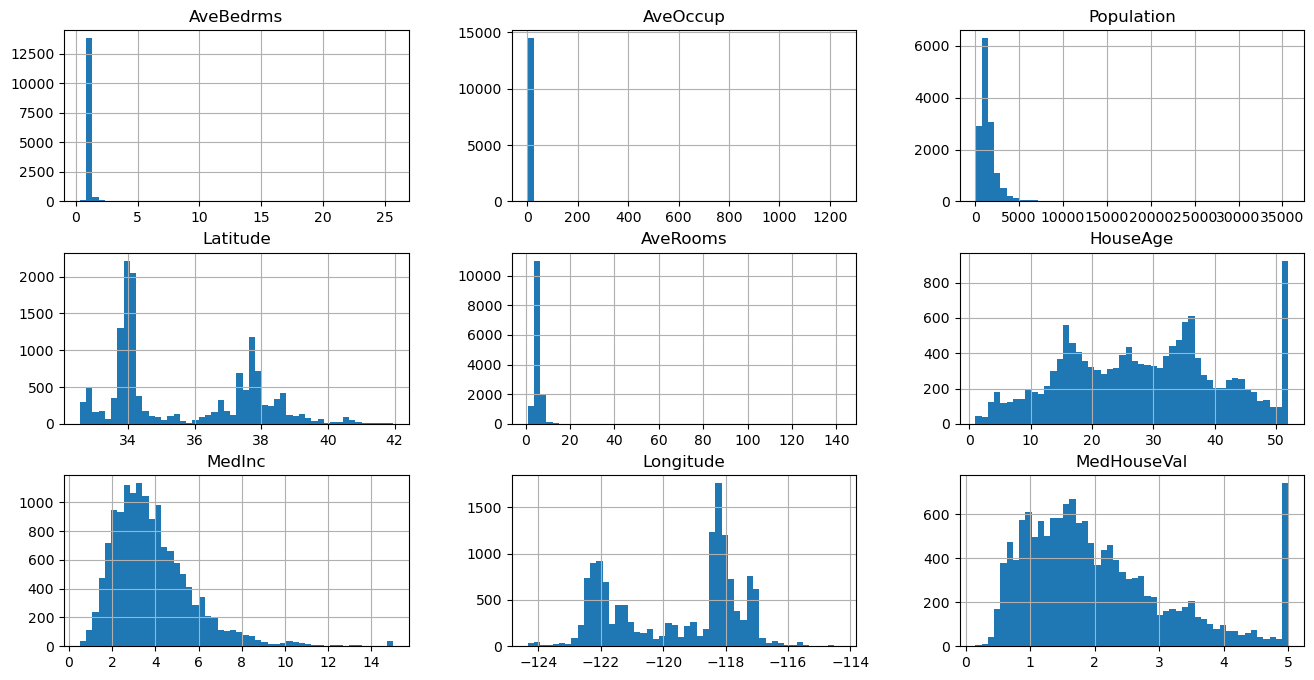

In [99]:
df_train.hist(bins=50,figsize=(16,8))
plt.show()

Para la mayoría de los distritos, la media de habitaciones tiene una distribución normal. Sin embargo, existen distritos donde la media de habitaciones es muy alta dado qxue hay distritos con universidades, zonas militares, etc. que aumentan el promedio de habitaciones del distrito.
Lo mismo se observa al acotar AveBedrms y AveOccup, dado que los distritos cuyos habitantes y convivientes promedio son más de 5 son muy anómalos. Así como también es extraño que haya distritos cuyo promedio de dormitorios sea mayor a 2.

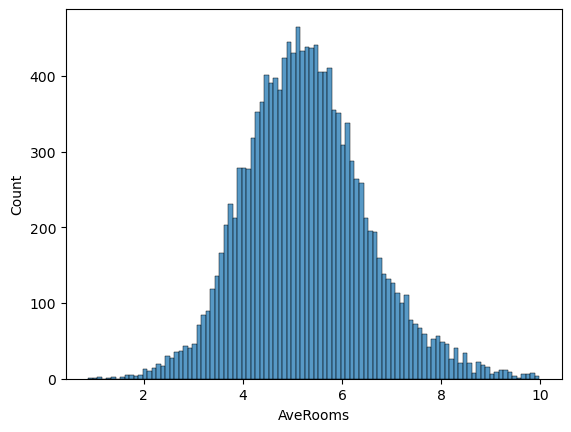

In [9]:
sns.histplot(data=df_train[df_train.AveRooms<10], x='AveRooms', bins=100)
plt.show()

(171, 9)
(14277, 9)


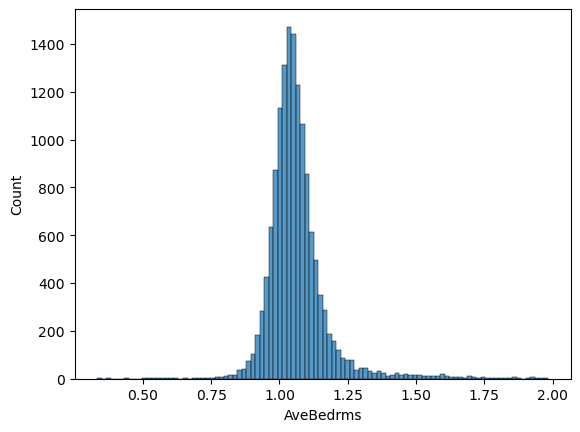

In [39]:
print(df_train[df_train.AveBedrms>=2].shape)
print(df_train[df_train.AveBedrms<2].shape)
sns.histplot(data=df_train[df_train.AveBedrms<2], x='AveBedrms', bins=100)
plt.show()

(77, 9)
(14371, 9)


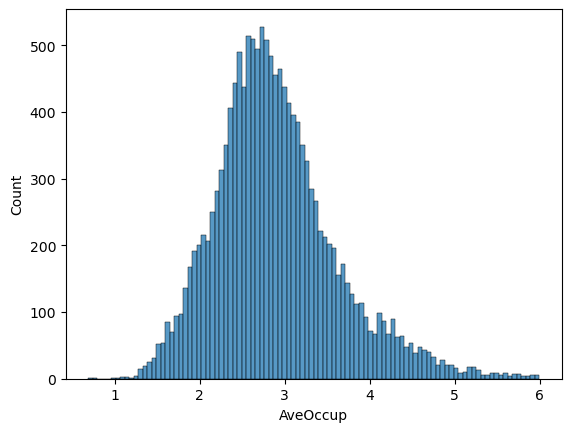

In [51]:
qty = 6
print(df_train[df_train.AveOccup>=qty].shape)
print(df_train[df_train.AveOccup<qty].shape)
sns.histplot(data=df_train[df_train.AveOccup<qty], x='AveOccup', bins=100)
plt.show()

#### 3. Calcular una regresión lineal utilizando todos los atributos. 

1. Con el conjunto de entrenamiento, calcular la varianza total del modelo y la varianza explicada por el modelo.
2. ¿Está el modelo capturando adecuadamente el comportamiento del target? Fundamente su respuesta.

#### 4. Calcular las métricas de MSE, MAE y R² sobre el conjunto de evaluación.

#### 5. Crear una regresión de Ridge. 

1. Usar validación cruzada de 5 folds y tomar como métrica el MSE.
2. Buscar el mejor valor de α en el rango [0, 12.5].
3. Graficar el MSE en función de α.

#### 6. Comparar los resultados obtenidos entre la regresión lineal y la mejor regresión de Ridge, evaluando el conjunto de prueba.

1. ¿Cuál de los dos modelos obtiene mejores resultados en términos de MSE y MAE? ¿Poseen suficiente diferencia como para indicar si uno es mejor que el otro?
2. ¿Qué tipo de error podría haberse reducido?